In [1]:
import pandas as pd
import numpy as np
dataDir = 'E:/Table summary files/'
print(dataDir)
################################################################################
prt1 = 'Table_Summary_TopMed_Imputed_Median'+'.csv'
output_path1 = dataDir + prt1

df = pd.read_csv(output_path1, header = 0);
display(df)

E:/Table summary files/


,chr,start,end,kappa,tau,T_original,T_Knock1,T_Knock2,T_Knock3,T_Knock4,T_Knock5,q-value,Ind,MarkerName
0,1,106803482,106803482,5,6.876982,0.066018,0.011434,0.276260,0.002092,1.002200,6.943000,1.000000,1,unspec
1,1,106803523,106803523,1,0.000823,0.001879,0.002702,0.002610,0.002211,0.000718,0.000104,1.000000,2,unspec
2,1,106804091,106804091,1,0.001663,0.004656,0.004925,0.003169,0.004707,0.001799,0.003261,1.000000,3,unspec
3,1,106804698,106804698,3,0.000489,0.002345,0.002250,0.001989,0.002739,0.002080,0.002683,1.000000,4,unspec
4,1,106805935,106805935,3,0.001542,0.002350,0.002734,0.001414,0.002955,0.001391,0.000343,1.000000,5,unspec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11657,22,39973838,39973838,1,0.003010,0.001975,0.006103,0.003332,0.003093,0.004527,0.002040,1.000000,11658,unspec
11658,22,39974147,39974147,5,0.001110,0.002766,0.001845,0.002627,0.001082,0.001791,0.002956,1.000000,11659,unspec
11659,22,39975500,39975500,0,0.001138,0.003064,0.002627,0.002018,0.001926,0.001391,0.001838,0.861615,11660,unspec
11660,22,39975635,39975635,3,0.001753,0.001745,0.001821,0.001458,0.003574,0.003265,0.002184,1.000000,11661,unspec


In [2]:
other_data = np.zeros(len(df['kappa']))
other_data.shape
import numpy as np
series_kappa = pd.Series(df['kappa'])
kappa_NP_array = np.array(series_kappa)  # convert to numpy array
Kappa_NZ = kappa_NP_array.nonzero()       # find non-zero elements of Kappa
Kappa_NZ

mask_zero = np.ones(len(df['kappa']), np.bool)
mask_zero[Kappa_NZ] = 0
mask_zero

true_list_zero = np.where(mask_zero)
true_list_zero


(array([    5,    12,    13, ..., 11642, 11659, 11661], dtype=int64),)

In [3]:
other_data[true_list_zero] = df['tau'][mask_zero]
other_data.shape

(11662,)

In [4]:
import math
df['-log_10(q)'] = -np.log10(df['q-value'])
df.shape

(11662, 15)

In [5]:
running_pos = 0
cumulative_pos = []
for chrom, group_df in df.groupby('chr'):  
    cumulative_pos.append(group_df['start'] + running_pos)
    running_pos += group_df['start'].max()
    
df['cumulative_pos'] = pd.concat(cumulative_pos)

df

,chr,start,end,kappa,tau,T_original,T_Knock1,T_Knock2,T_Knock3,T_Knock4,T_Knock5,q-value,Ind,MarkerName,-log_10(q),cumulative_pos
0,1,106803482,106803482,5,6.876982,0.066018,0.011434,0.276260,0.002092,1.002200,6.943000,1.000000,1,unspec,-0.000000,106803482
1,1,106803523,106803523,1,0.000823,0.001879,0.002702,0.002610,0.002211,0.000718,0.000104,1.000000,2,unspec,-0.000000,106803523
2,1,106804091,106804091,1,0.001663,0.004656,0.004925,0.003169,0.004707,0.001799,0.003261,1.000000,3,unspec,-0.000000,106804091
3,1,106804698,106804698,3,0.000489,0.002345,0.002250,0.001989,0.002739,0.002080,0.002683,1.000000,4,unspec,-0.000000,106804698
4,1,106805935,106805935,3,0.001542,0.002350,0.002734,0.001414,0.002955,0.001391,0.000343,1.000000,5,unspec,-0.000000,106805935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11657,22,39973838,39973838,1,0.003010,0.001975,0.006103,0.003332,0.003093,0.004527,0.002040,1.000000,11658,unspec,-0.000000,2196486115
11658,22,39974147,39974147,5,0.001110,0.002766,0.001845,0.002627,0.001082,0.001791,0.002956,1.000000,11659,unspec,-0.000000,2196486424
11659,22,39975500,39975500,0,0.001138,0.003064,0.002627,0.002018,0.001926,0.001391,0.001838,0.861615,11660,unspec,0.064687,2196487777
11660,22,39975635,39975635,3,0.001753,0.001745,0.001821,0.001458,0.003574,0.003265,0.002184,1.000000,11661,unspec,-0.000000,2196487912


In [6]:
df['SNP number'] = df.index
df

,chr,start,end,kappa,tau,T_original,T_Knock1,T_Knock2,T_Knock3,T_Knock4,T_Knock5,q-value,Ind,MarkerName,-log_10(q),cumulative_pos,SNP number
0,1,106803482,106803482,5,6.876982,0.066018,0.011434,0.276260,0.002092,1.002200,6.943000,1.000000,1,unspec,-0.000000,106803482,0
1,1,106803523,106803523,1,0.000823,0.001879,0.002702,0.002610,0.002211,0.000718,0.000104,1.000000,2,unspec,-0.000000,106803523,1
2,1,106804091,106804091,1,0.001663,0.004656,0.004925,0.003169,0.004707,0.001799,0.003261,1.000000,3,unspec,-0.000000,106804091,2
3,1,106804698,106804698,3,0.000489,0.002345,0.002250,0.001989,0.002739,0.002080,0.002683,1.000000,4,unspec,-0.000000,106804698,3
4,1,106805935,106805935,3,0.001542,0.002350,0.002734,0.001414,0.002955,0.001391,0.000343,1.000000,5,unspec,-0.000000,106805935,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11657,22,39973838,39973838,1,0.003010,0.001975,0.006103,0.003332,0.003093,0.004527,0.002040,1.000000,11658,unspec,-0.000000,2196486115,11657
11658,22,39974147,39974147,5,0.001110,0.002766,0.001845,0.002627,0.001082,0.001791,0.002956,1.000000,11659,unspec,-0.000000,2196486424,11658
11659,22,39975500,39975500,0,0.001138,0.003064,0.002627,0.002018,0.001926,0.001391,0.001838,0.861615,11660,unspec,0.064687,2196487777,11659
11660,22,39975635,39975635,3,0.001753,0.001745,0.001821,0.001458,0.003574,0.003265,0.002184,1.000000,11661,unspec,-0.000000,2196487912,11660


161

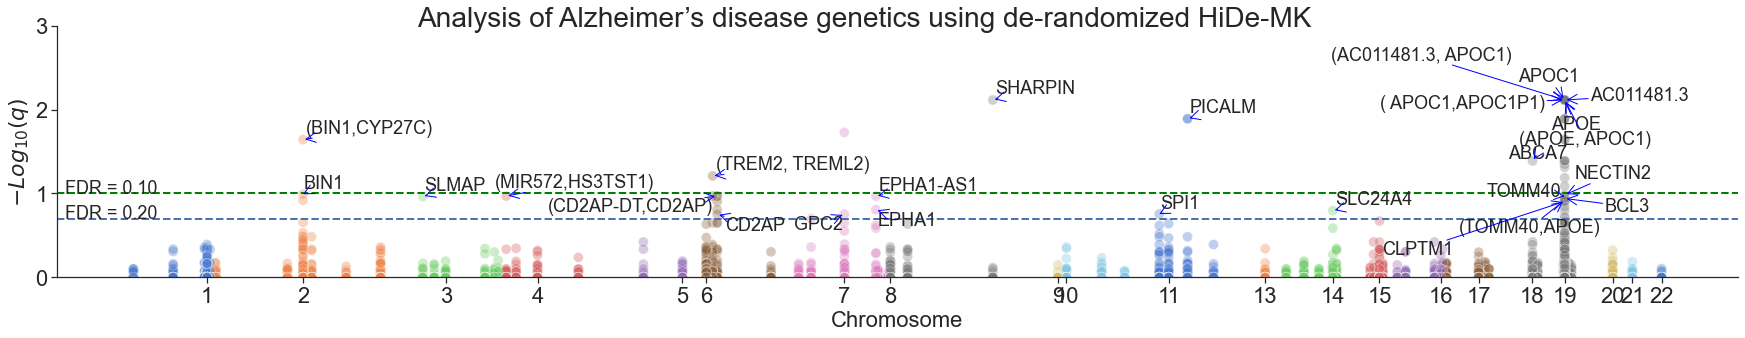

In [7]:
import seaborn as sns
%matplotlib inline
#sns.set(font_scale=.8)
import adjustText
from adjustText import adjust_text
sns.set(font_scale=2,style="ticks")
#sns.set(style="whitegrid")
g = sns.relplot(    
    data = df.sample(11662),
    x = 'cumulative_pos',
    y = '-log_10(q)',
    aspect = 5,
    hue = 'chr',
    palette = 'muted',  
    alpha=0.35,
    s=100,
    legend=None
)
g.ax.set_ylim([0,3])
g.ax.set_xlabel('Chromosome', size = 22)
g.ax.set_ylabel( "$-Log_{10}(q)$" , size = 22),
g.ax.font_scale=12
g.ax.set_xticks(df.groupby('chr')['cumulative_pos'].median())
g.ax.set_xticklabels(df['chr'].unique())
g.ax.axhline(-np.log10(0.1), linestyle='--', color='green', linewidth=2)
g.ax.text(14000000,-np.log10(0.1), "FDR = 0.10", size =18)
g.ax.axhline(-np.log10(0.2), linestyle='--', linewidth=2)
g.ax.text(14000000,-np.log10(0.2), "FDR = 0.20", size =18)
g.fig.suptitle('Analysis of Alzheimer’s disease genetics using de-randomized HiDe-MK',size=28)
Temp1 = df[df['q-value'] < 0.2]
Unique_marker = Temp1['MarkerName'].drop_duplicates()
Final = df.iloc[list(Unique_marker.index)]
annotations = Final.apply(lambda p : g.ax.annotate(p['MarkerName'], (p['cumulative_pos'], p['-log_10(q)']),size=18), axis=1).to_list()
adjust_text(annotations, arrowprops = {'arrowstyle' : '->', 'color' : 'blue'}, ha='center', va='top')